In [21]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import seaborn as sns

In [17]:
os.getcwd() 

'/Users/masanoritakahashi/Documents/aqi/modefieddata'

In [18]:
!ls

EDA_for_timeseriesdata.ipynb
alipur_delhi.csv
conbind_modefieddata-ARIMA.ipynb
conbind_modefieddata-Prophet.ipynb
conbind_modefieddata-単変量XGboost_予測値で予測.ipynb
conbind_modefieddata.ipynb
conbind_modefieddata_all.ipynb
indirapuram_ghaziabad.csv
mduni_rohtak.csv
murthal_sonipat.csv
rohini_1015.csv
rohini_1016.csv
rohini_1024_co.csv
rohini_1024_no2.csv
rohini_1024_o3.csv
rohini_1024_pm10.csv
rohini_1024_pm25.csv
sector125_noida.csv
sector16a_faridabad.csv


In [19]:
co=pd.read_csv("rohini_1024_co.csv").iloc[:,1:]
no2=pd.read_csv("rohini_1024_no2.csv").iloc[:,1:].drop("local_time", axis=1)
o3=pd.read_csv("rohini_1024_o3.csv").iloc[:,1:].drop("local_time", axis=1)
pm10=pd.read_csv("rohini_1024_pm10.csv").iloc[:,1:].drop("local_time", axis=1)
pm25=pd.read_csv("rohini_1024_pm25.csv").iloc[:,1:].drop("local_time", axis=1)

In [20]:
df=pd.concat([co, no2, o3, pm10, pm25],axis=1).loc[:"2019-10-23 00:00:00",:]

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


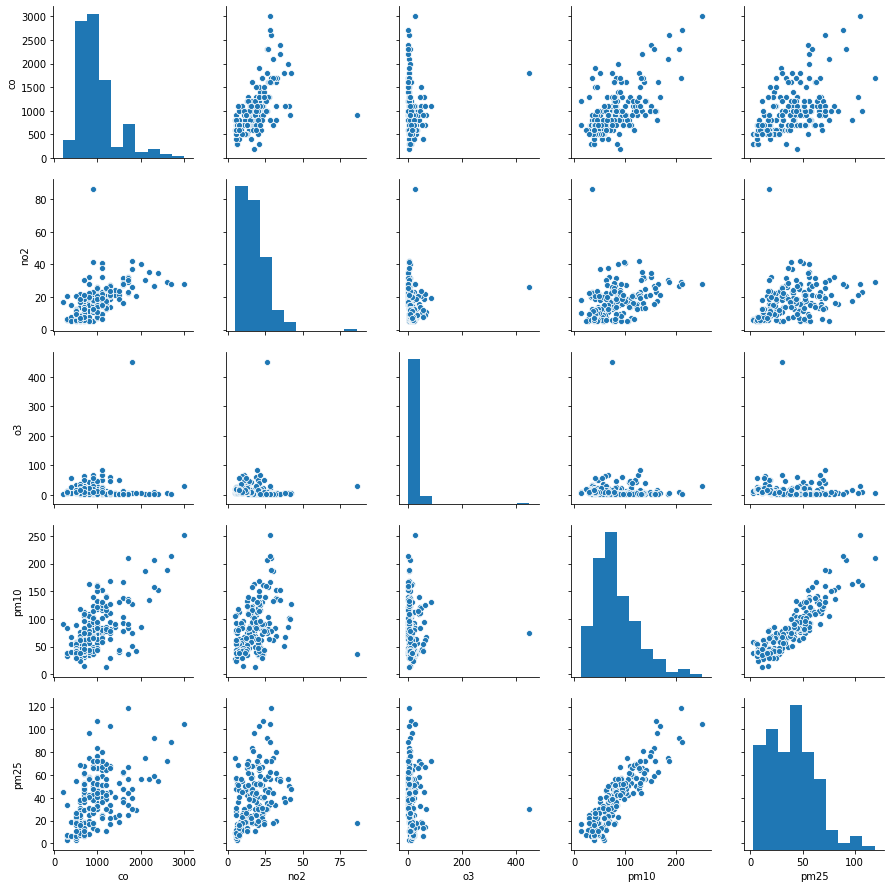

In [22]:
sns.pairplot(df)

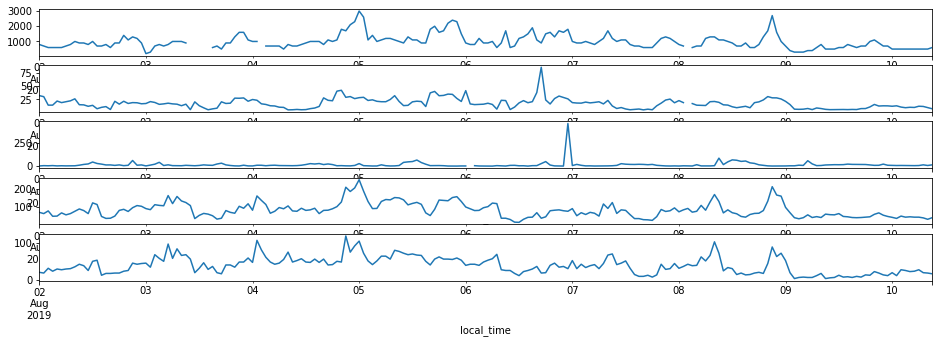

In [30]:
plt.figure(figsize=(16, 5))

plt.subplot(5,1,1)
values_co = pd.Series(df["co"], dtype="float")
values_co.index= pd.to_datetime(df["local_time"])
values_co.plot()

plt.subplot(5,1,2)
values_no2 = pd.Series(df["no2"], dtype="float")
values_no2.index= pd.to_datetime(df["local_time"])
values_no2.plot()

plt.subplot(5,1,3)
values_o3 = pd.Series(df["o3"], dtype="float")
values_o3.index= pd.to_datetime(df["local_time"])
values_o3.plot()

plt.subplot(5,1,4)
values_pm10 = pd.Series(df["pm10"], dtype="float")
values_pm10.index= pd.to_datetime(df["local_time"])
values_pm10.plot()

plt.subplot(5,1,5)
values_pm25 = pd.Series(df["pm25"], dtype="float")
values_pm25.index= pd.to_datetime(df["local_time"])
values_pm25.plot()

In [40]:
print(df["pm25"][1:].corr(df["co"][:-1]))
print(df["pm25"][3:].corr(df["co"][:-3]))
print(df["pm25"][6:].corr(df["co"][:-6]))
print(df["pm25"][9:].corr(df["co"][:-9]))
print(df["pm25"][12:].corr(df["co"][:-12]))
print(df["pm25"][24:].corr(df["co"][:-24]))
print(df["pm25"][72:].corr(df["co"][:-72]))

0.5045132408975539
0.497505434511342
0.48817743637945277
0.47936142087021033
0.47084222815892646
0.4411231534049058
0.2727158954730116


In [41]:
print(df["pm25"][1:].corr(df["no2"][:-1]))
print(df["pm25"][3:].corr(df["no2"][:-3]))
print(df["pm25"][6:].corr(df["no2"][:-6]))
print(df["pm25"][9:].corr(df["no2"][:-9]))
print(df["pm25"][12:].corr(df["no2"][:-12]))
print(df["pm25"][24:].corr(df["no2"][:-24]))
print(df["pm25"][72:].corr(df["no2"][:-72]))

0.3223209048543838
0.3260811283620216
0.3224429640512929
0.3219589583525913
0.3153059053746402
0.23697588742771264
-0.08932218400695731


In [42]:
print(df["pm25"][1:].corr(df["o3"][:-1]))
print(df["pm25"][3:].corr(df["o3"][:-3]))
print(df["pm25"][6:].corr(df["o3"][:-6]))
print(df["pm25"][9:].corr(df["o3"][:-9]))
print(df["pm25"][12:].corr(df["o3"][:-12]))
print(df["pm25"][24:].corr(df["o3"][:-24]))
print(df["pm25"][72:].corr(df["o3"][:-72]))

-0.06442775819552754
-0.06812389722539978
-0.07432758632698269
-0.08060898155044349
-0.08196968033493125
-0.0969647738372601
-0.06631820656180623


In [43]:
print(df["pm25"][1:].corr(df["pm10"][:-1]))
print(df["pm25"][3:].corr(df["pm10"][:-3]))
print(df["pm25"][6:].corr(df["pm10"][:-6]))
print(df["pm25"][9:].corr(df["pm10"][:-9]))
print(df["pm25"][12:].corr(df["pm10"][:-12]))
print(df["pm25"][24:].corr(df["pm10"][:-24]))
print(df["pm25"][72:].corr(df["pm10"][:-72]))

0.8929425249293271
0.8923535040300048
0.8915353709322724
0.8902200225453527
0.8888632386968016
0.8909617388573067
0.9064341703253413


202